In [131]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
plt.style.use("dark_background")

In [132]:
df = pd.read_csv('data/landslides.csv')
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,NaN,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [133]:
df.isnull().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

In [134]:
df.isnull().sum().sum()

1318

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [136]:
df.dropna(subset= 'date', inplace=True)
df['time'] = df['time'].fillna('Not known')
mean = df['fatalities'].mean()
df['fatalities'] = df['fatalities'].fillna(mean)
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,3/22/07,Not known,United States,Ohio,17288,Landslide,Rain,1.462231
2,56,4/6/07,Not known,United States,Pennsylvania,15930,Landslide,Rain,1.462231
3,59,4/14/07,Not known,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231
4,61,4/15/07,Not known,United States,Kentucky,6903,Landslide,Downpour,0.000000
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not known,United States,North Carolina,1646,Rockfall,NaN,0.000000
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.000000
1690,7539,2/23/16,Not known,United States,West Virginia,2406,Landslide,Rain,0.000000
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1690 non-null   int64  
 1   date            1690 non-null   object 
 2   time            1690 non-null   object 
 3   country_name    1690 non-null   object 
 4   state/province  1689 non-null   object 
 5   population      1690 non-null   int64  
 6   landslide_type  1689 non-null   object 
 7   trigger         1688 non-null   object 
 8   fatalities      1690 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 132.0+ KB


In [138]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = pd.DatetimeIndex(df['date']).month
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities,month
0,34,2007-03-02,Night,United States,Virginia,16000,Landslide,Rain,1.462231,3
1,42,2007-03-22,Not known,United States,Ohio,17288,Landslide,Rain,1.462231,3
2,56,2007-04-06,Not known,United States,Pennsylvania,15930,Landslide,Rain,1.462231,4
3,59,2007-04-14,Not known,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231,4
4,61,2007-04-15,Not known,United States,Kentucky,6903,Landslide,Downpour,0.000000,4
...,...,...,...,...,...,...,...,...,...,...
1688,7535,2015-12-07,Not known,United States,North Carolina,1646,Rockfall,NaN,0.000000,12
1689,7537,2016-02-22,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.000000,2
1690,7539,2016-02-23,Not known,United States,West Virginia,2406,Landslide,Rain,0.000000,2
1691,7540,2016-02-26,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.000000,2


<AxesSubplot:xlabel='month', ylabel='Count'>

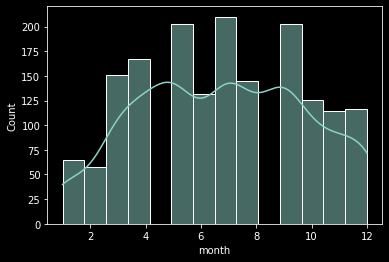

In [139]:
sns.histplot(data=df['month'], kde=True)


In [140]:
df['time'].value_counts()

Not known        1064
Night              97
Morning            87
Afternoon          58
Early morning      36
                 ... 
1:13                1
9:40:00             1
11:50:00            1
                    1
21:06               1
Name: time, Length: 160, dtype: int64

In [141]:
def time_cleaning(x):
    if ':' in x.lower():
        if int(x.split(':')[0]) >= 12 and int(x.split(':')[0]) < 18:
            x = 'Afternoon'
        elif int(x.split(':')[0]) < 12:
            x = 'Morning'
        elif int(x.split(':')[0]) >= 18:
            x = 'Night'
    elif 'afternoon' in x.lower():
        x = 'Afternoon'
    elif 'morning' in x.lower():
        x = 'Morning'
    elif 'evening' in x.lower():
        x = 'Evening'
    elif 'night' in x.lower():
        x = 'Night'
    return x

df['time'] = df['time'].apply(time_cleaning)
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities,month
0,34,2007-03-02,Night,United States,Virginia,16000,Landslide,Rain,1.462231,3
1,42,2007-03-22,Not known,United States,Ohio,17288,Landslide,Rain,1.462231,3
2,56,2007-04-06,Not known,United States,Pennsylvania,15930,Landslide,Rain,1.462231,4
3,59,2007-04-14,Not known,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231,4
4,61,2007-04-15,Not known,United States,Kentucky,6903,Landslide,Downpour,0.000000,4
...,...,...,...,...,...,...,...,...,...,...
1688,7535,2015-12-07,Not known,United States,North Carolina,1646,Rockfall,NaN,0.000000,12
1689,7537,2016-02-22,Morning,United States,West Virginia,51400,Mudslide,Unknown,0.000000,2
1690,7539,2016-02-23,Not known,United States,West Virginia,2406,Landslide,Rain,0.000000,2
1691,7540,2016-02-26,Night,United States,West Virginia,1048,Rockfall,Unknown,0.000000,2


In [142]:
df['time'].unique()

array(['Night', 'Not known', 'Morning', 'Afternoon', 'Evening',
       'Before dawn', ' ', '****', 'Unknown'], dtype=object)

In [143]:
df['time'].replace({
    'Unknown':'Not known', 
    ' ':'Not known',
    'Before dawn':'Morning',
    '****':'Not known'
    }, inplace=True)
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities,month
0,34,2007-03-02,Night,United States,Virginia,16000,Landslide,Rain,1.462231,3
1,42,2007-03-22,Not known,United States,Ohio,17288,Landslide,Rain,1.462231,3
2,56,2007-04-06,Not known,United States,Pennsylvania,15930,Landslide,Rain,1.462231,4
3,59,2007-04-14,Not known,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231,4
4,61,2007-04-15,Not known,United States,Kentucky,6903,Landslide,Downpour,0.000000,4
...,...,...,...,...,...,...,...,...,...,...
1688,7535,2015-12-07,Not known,United States,North Carolina,1646,Rockfall,NaN,0.000000,12
1689,7537,2016-02-22,Morning,United States,West Virginia,51400,Mudslide,Unknown,0.000000,2
1690,7539,2016-02-23,Not known,United States,West Virginia,2406,Landslide,Rain,0.000000,2
1691,7540,2016-02-26,Night,United States,West Virginia,1048,Rockfall,Unknown,0.000000,2


In [144]:
df['time'].value_counts()

Not known    1067
Morning       265
Night         194
Afternoon     145
Evening        19
Name: time, dtype: int64